In [199]:
import pandas as pd
import seaborn as sns
import os
import os.path as osp
import matplotlib.pyplot as plt
import collections

In [338]:
path = "summarized_results_main.csv"
df = pd.read_csv(path)
dst = 'figures'
model='resnet34'
drop_names = None # ['GraSP']#['ERK', "SNIP", 'iterSNIP', 'Rand']

In [339]:
subdf = df.loc[df.model_type == model]

In [340]:
import numpy as np
import math
sns.set(font_scale=1.5)
def double_axis_plot(data, x, y1, y2,  hue_type, drop=None, x_name=None, y1_name = None, y2_name = None, title=None, save=False, ylim=None, xlim=None, y1_std=None, y2_std=None):
    data = data.copy()
    plt.figure(figsize=(12, 8))
    if drop:
        for d in drop:
            data = data.loc[data.prune_type != d]    
   
    data = data.sort_values(by=[x])
    ax = sns.lineplot(data=data, x=x, y=y1, hue=hue_type, marker='o', linewidth=2.5, markersize=9)

    ax.grid()
    ax.set_ylabel(y1_name)
    ax.set_xlabel(x_name)
    ax.set_title(title)
    if y2 is not None:
        ax2 = ax.twinx()
        sns.lineplot(data=data, x=x, y=y2, hue=hue_type, ax=ax2, linestyle="dashed", marker='P', linewidth=2.5, markersize=12)

        ax.get_legend().remove()
        ax2.grid()
        ax2.set_ylabel(y2_name)
        ax2.legend(loc=4)
    ax.grid()
    ax2.grid()
    
    def std(name):
        if 'mean' in name:
            std = name.replace('mean', 'std')
        else:
            std = name + "_std"
        return std
    for x_i in data[hue_type].unique().tolist():
        subdata = data.loc[data[hue_type] == x_i]
        if y1_std:
            ax.fill_between(subdata[x], y1=subdata[y1] - subdata[y1_std], y2=subdata[y1] +  subdata[y1_std], alpha=.5)
        if y2_std:
            ax2.fill_between(subdata[x], y1=subdata[y2] - subdata[y2_std], y2=subdata[y2] + subdata[y2_std], alpha=.5)

    if ylim is not None:
        ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_xlim(xlim)
    if save:
        plt.tight_layout()
        plt.savefig(osp.join(dst, title+".svg"))

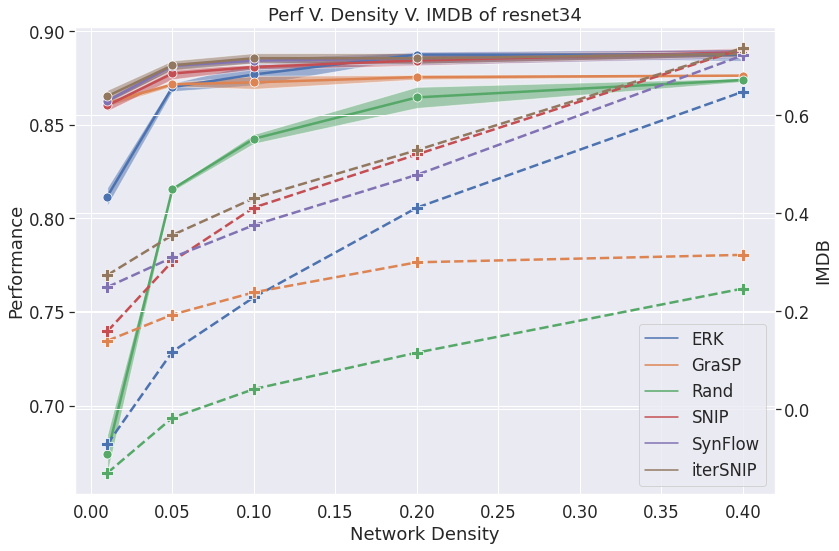

In [341]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="irm_norm_mean", y1_std='acc_std', hue_type='prune_type', x_name="Network Density", y1_name='Performance', y2_name="IMDB",
                drop=drop_names, title=f"Perf V. Density V. IMDB of {model}", save=True)

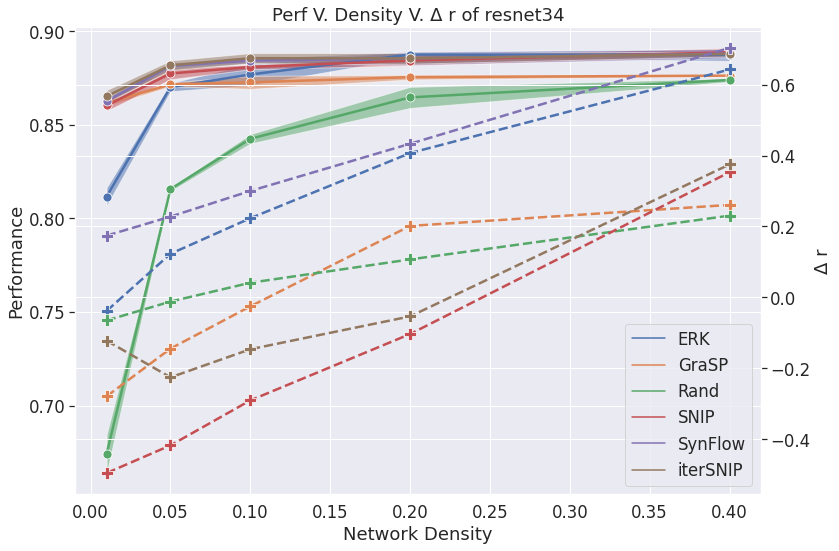

In [342]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="rm_norm_mean", hue_type='prune_type', x_name="Network Density", y1_name='Performance', y2_name="\u0394 r",
                drop=drop_names, title=f"Perf V. Density V. \u0394 r of {model}", save=True, y1_std="acc_std")

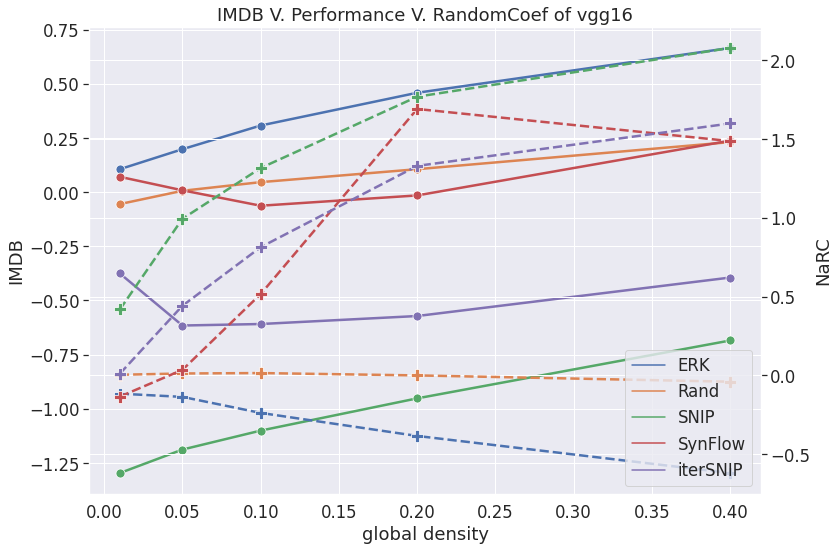

In [332]:
double_axis_plot(subdf, x='global_density', y1='rm_norm_mean', y2="random_factor_mean", hue_type='prune_type', x_name="global density", y1_name='IMDB', y2_name="NaRC",
                drop=drop_names, title=f"IMDB V. Performance V. RandomCoef of {model}", save=True)

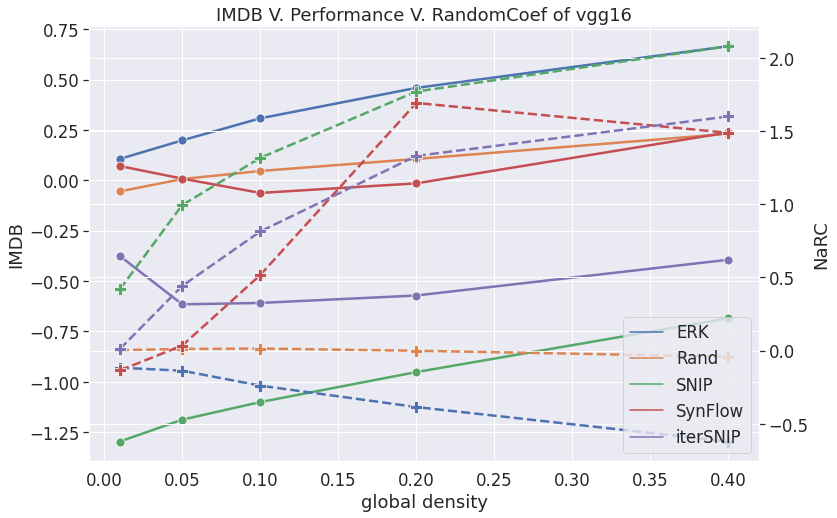

In [333]:
double_axis_plot(subdf, x='global_density', y1='rm_norm_mean', y2="random_factor_mean", hue_type='prune_type', x_name="global density", y1_name='IMDB', y2_name="NaRC",
                drop=drop_names, title=f"IMDB V. Performance V. RandomCoef of {model}", save=False)

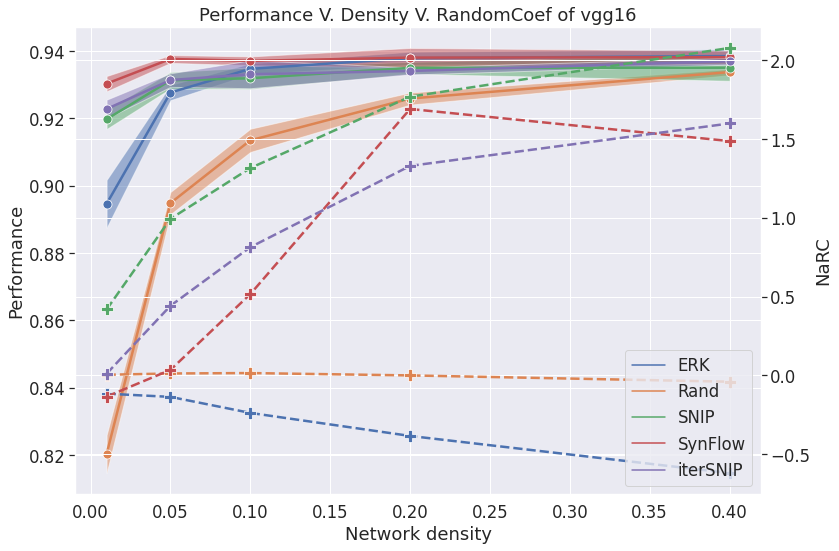

In [334]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="random_factor_mean", hue_type='prune_type', x_name="Network density", y1_name='Performance', y2_name="NaRC",
                drop=drop_names, title=f"Performance V. Density V. RandomCoef of {model}", save=True, y1_std='acc_std')

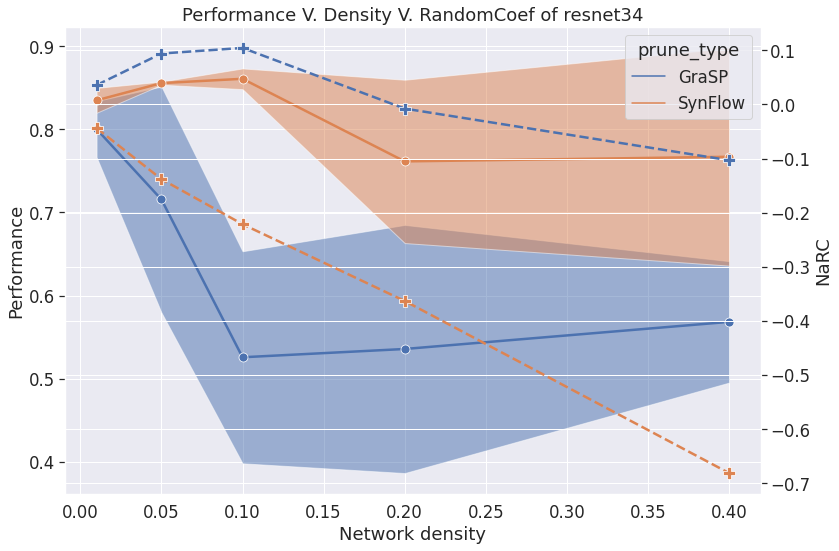

In [316]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="random_factor_mean", hue_type='prune_type', x_name="Network density", y1_name='Performance', y2_name="NaRC",
                drop=drop_names, title=f"Performance V. Density V. RandomCoef of {model}", save=True, y1_std='acc_std')